In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
import pmdarima as pm

In [15]:
df = pd.read_csv("../Datasets/AMD.csv")
df['Date'] = pd.to_datetime(df['Date'])

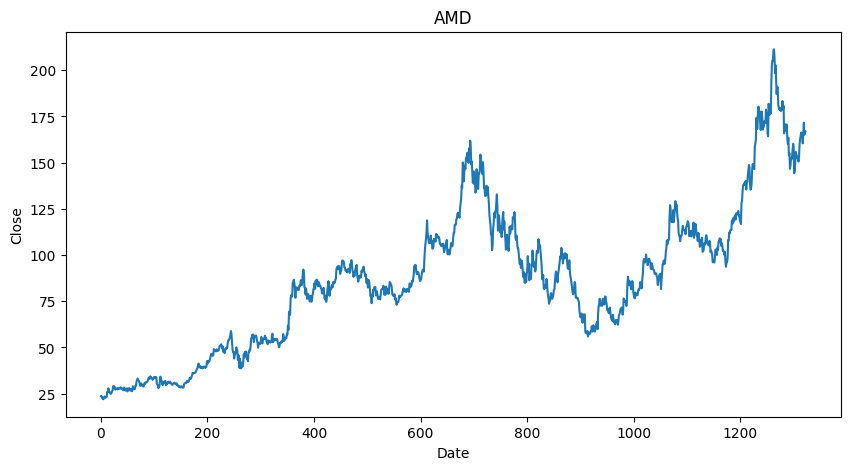

In [16]:
plt.figure (figsize=(10, 5))
plt.plot(df['Close'])
plt.title('AMD')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

In [17]:
time_series_df = df['Close']
train_data = time_series_df[:int(0.7*len(time_series_df))]
test_data = time_series_df[int(0.7*len(time_series_df)):]

In [18]:
model = pm.auto_arima(train_data,      
                      start_p=0, start_q=0 ,
                      max_p=10, max_q=10,
                      m=7,              
                      seasonal = True,   
                      d=1, 
                      D=1,
                      trace=True, error_action='ignore',  suppress_warnings=True, stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=5053.347, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=4787.281, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.30 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=5054.382, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=4728.294, Time=0.20 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=1.15 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=4727.376, Time=0.16 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=4786.981, Time=0.08 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=inf, Time=0.82 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=4728.287, Time=0.19 sec
 ARIMA(1,1,1)(2,1,0)[7]             : AIC=4730.284, Time=0.41 sec
 ARIMA(0,1,0)(2,1,0)[7] intercept   : AIC=4729.376, Time=0.64 sec

Best model:  ARIMA(0,1,0)(2,1,0)[7]          
Total fit t

In [19]:
arima_fit = model.fit(train_data)
test_pred = arima_fit.predict(n_periods=len(test_data))

In [20]:
n30d = arima_fit.predict(n_periods=len(test_data) + 30)
n30d = n30d[-30:]

In [21]:
n60d = arima_fit.predict(n_periods=len(test_data) + 60)
n60d = n60d[-30:]

In [22]:
n90d = arima_fit.predict(n_periods=len(test_data) + 90)
n90d = n90d[-30:]

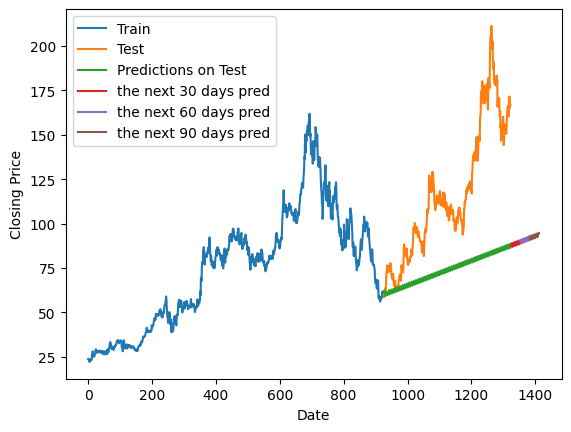

In [23]:
plt.plot(train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, test_pred, label='Predictions on Test')
plt.plot(n30d.index, n30d, label='the next 30 days pred')
plt.plot(n60d.index, n60d, label='the next 60 days pred')
plt.plot(n90d.index, n90d, label='the next 90 days pred')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [24]:
test_rmse = np.sqrt(np.mean((test_pred - test_data)**2))
print('Testing RMSE:', test_rmse)

test_mape = np.mean(np.abs((test_data - test_pred) / test_data)) * 100
print("Testing MAPE:", test_mape)

test_mae = np.mean(np.abs(test_pred - test_data))
print("Testing MAE:", test_mae)

Testing RMSE: 52.2212208162171
Testing MAPE: 32.426787438132045
Testing MAE: 42.92057424287577
